In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [50]:
# define parameters
beta = 0.98
R = 1 / beta
sigma = 0.5
T = 100

In [59]:
# define grid A
b_max = 5
# b_grid = np.linspace(0, b_max, num = b_max * 10 + 1)
b_grid = np.linspace(0, b_max, num = 300)

In [80]:
# Define income process
y = np.zeros((T,1))
# Set y equal to 1 if t is even and 0 if t is odd
y[::2] = 1
y[1::2] = 0

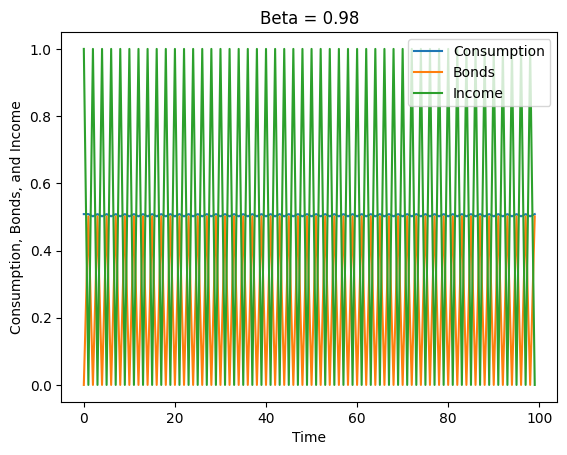

array([[0.5083612 ],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.5083612 ],
       [0.50167224],
       [0.508

In [60]:
@jit(nopython=True)

# define utility function, this is the flow utility accruing to consumption
def util(c):
    return (c ** (1 - (1 / sigma))) / (1 - (1 / sigma))

# Calculate consumption given current bonds, income, and future choice of bonds. 
def cons(b, y, b_prime): 
    return y + b - (R ** (-1)) * b_prime

# In the final period, the individual consumes their bonds and income, 
# hence we can calculate the value function directly.
## Initialize V
V = np.zeros((T, len(b_grid)))
V[T-1, :] = util(y[T-1] + b_grid)
# Similarly, we can also express consumption directly. 
## Initialize C
C = np.zeros((T, len(b_grid)))
C[T-1, :] = y[T-1] + b_grid
# Similarly, and final period choice of bonds. 
## Initialize B
B = np.zeros((T, len(b_grid)))
B[T-1, :] = 0

# Note that V and C are matrices. Each row corresponds to a period,
# and each column corresponds to a fixed value of b.

# Define an objective function, which is the sum of utility 
# from consumption and the discounted value of V in the next period.
# We prevent negative consumpption. 
def TwoPeriodUtility(b, b_prime, t):

    # Calculate flow utility given b and b_prime
    c = cons(b, y[t], b_prime)
    u = util(c)
    # Calculate the value of V in the next period
    ## First, find the index of b_prime in the grid
    i = np.where(b_grid == b_prime)[0][0]
    ## Then, use the index to find the value of V in the next period
    continuation = V[t+1, i]
    ## rule out negative consumption
    negative_consumption_flag = (y[t] + b - (R ** (-1)) * b_prime) < 0
    negative_consumption_value = -9e10 * negative_consumption_flag
    ## return value
    return u + beta * continuation + negative_consumption_value

# Induct backwards from period T-2 to 0. 
# In each period t, we find the optimal choice of b_prime for each b.
# We then use this to calculate the value of V in period t.
for t in range(T-2, -1, -1):
    for i, b in enumerate(b_grid):
        # Find the optimal choice of b_prime for each b
        b_prime_opt = b_grid[np.argmax([TwoPeriodUtility(b, b_prime, t) for b_prime in b_grid])]
        # Find the value of V for each b
        V[t, i] = TwoPeriodUtility(b, b_prime_opt, t)
        # Find the value of C for each b
        C[t, i] = cons(b, y[t], b_prime_opt)
        # Find the value of B for each b
        B[t, i] = b_prime_opt

# Find the optimal path of bond holdings, starting with bonds b0
b0 = 0
b_opt = np.zeros((T, 1))
b_opt[0] = b0
for t in range(1, T):
    i = np.where(b_grid == b_opt[t-1])[0][0]
    b_opt[t] = B[t-1, i]


# Find the optimal path of consumption, starting with bonds b0
c_opt = np.zeros((T, 1))
c_opt[0] = cons(b0, y[0], b_opt[1])
for t in range(1, T):
    i = np.where(b_grid == b_opt[t-1])[0][0]
    c_opt[t] = C[t-1, i]

# Plot the path of consumption, the path of bond holdings, 
# and the path of income all on the same graph. 
plt.plot(c_opt, label = 'Consumption')
plt.plot(b_opt, label = 'Bonds')
plt.plot(y, label = 'Income')
plt.legend()
## Add a title
plt.title('Beta = 0.98')
## Add an x-axis label
plt.xlabel('Time')
## Add a y-axis label
plt.ylabel('Consumption, Bonds, and Income')
plt.show()

c_opt

In [81]:
# define parameters
beta = 0.9
R = 1 / 0.98
sigma = 0.5
T = 1000

In [82]:
@jit(nopython=True)

# define utility function, this is the flow utility accruing to consumption
def util(c):
    return (c ** (1 - (1 / sigma))) / (1 - (1 / sigma))

# Calculate consumption given current bonds, income, and future choice of bonds. 
def cons(b, y, b_prime): 
    return y + b - (R ** (-1)) * b_prime

# In the final period, the individual consumes their bonds and income, 
# hence we can calculate the value function directly.
## Initialize V
V = np.zeros((T, len(b_grid)))
V[T-1, :] = util(y[T-1] + b_grid)
# Similarly, we can also express consumption directly. 
## Initialize C
C = np.zeros((T, len(b_grid)))
C[T-1, :] = y[T-1] + b_grid
# Similarly, and final period choice of bonds. 
## Initialize B
B = np.zeros((T, len(b_grid)))
B[T-1, :] = 0

# Note that V and C are matrices. Each row corresponds to a period,
# and each column corresponds to a fixed value of b.

# Define an objective function, which is the sum of utility 
# from consumption and the discounted value of V in the next period.
# We prevent negative consumpption. 
def TwoPeriodUtility(b, b_prime, t):

    # Calculate flow utility given b and b_prime
    c = cons(b, y[t], b_prime)
    u = util(c)
    # Calculate the value of V in the next period
    ## First, find the index of b_prime in the grid
    i = np.where(b_grid == b_prime)[0][0]
    ## Then, use the index to find the value of V in the next period
    continuation = V[t+1, i]
    ## rule out negative consumption
    negative_consumption_flag = (y[t] + b - (R ** (-1)) * b_prime) < 0
    negative_consumption_value = -9e10 * negative_consumption_flag
    ## return value
    return u + beta * continuation + negative_consumption_value

# Induct backwards from period T-2 to 0. 
# In each period t, we find the optimal choice of b_prime for each b.
# We then use this to calculate the value of V in period t.
for t in range(T-2, -1, -1):
    for i, b in enumerate(b_grid):
        # Find the optimal choice of b_prime for each b
        b_prime_opt = b_grid[np.argmax([TwoPeriodUtility(b, b_prime, t) for b_prime in b_grid])]
        # Find the value of V for each b
        V[t, i] = TwoPeriodUtility(b, b_prime_opt, t)
        # Find the value of C for each b
        C[t, i] = cons(b, y[t], b_prime_opt)
        # Find the value of B for each b
        B[t, i] = b_prime_opt

# Find the optimal path of bond holdings, starting with bonds b0
b0 = 0
b_opt = np.zeros((T, 1))
b_opt[0] = b0
for t in range(1, T):
    i = np.where(b_grid == b_opt[t-1])[0][0]
    b_opt[t] = B[t-1, i]


# Find the optimal path of consumption, starting with bonds b0
c_opt = np.zeros((T, 1))
c_opt[0] = cons(b0, y[0], b_opt[1])
for t in range(1, T-1):
    c_opt[t] = cons(b_opt[t], y[t], b_opt[t+1])

# Plot the path of consumption, the path of bond holdings, 
# and the path of income all on the same graph. 
plt.plot(c_opt, label = 'Consumption')
plt.plot(b_opt, label = 'Bonds')
plt.plot(y, label = 'Income')
plt.legend()
## Add a title
plt.title('Beta = 0.20')
## Add an x-axis label
plt.xlabel('Time')
## Add a y-axis label
plt.ylabel('Consumption, Bonds, and Income')
plt.show()

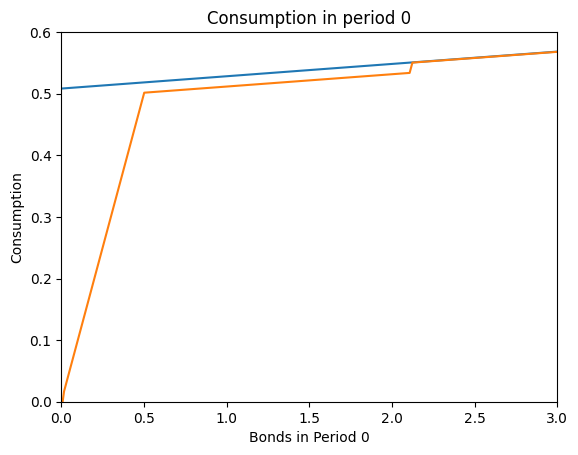

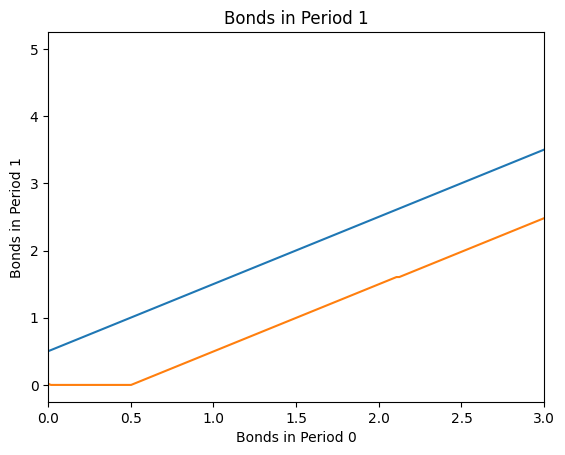

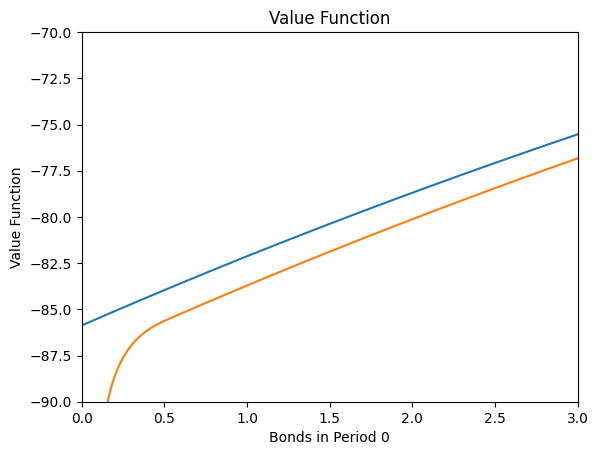

In [73]:
# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, C[0,:], label = 'Summer')
plt.plot(b_grid, C[1,:], label = 'Winter')
## Add a title
plt.title('Consumption in Period 0; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Consumption')
## Restrict to certain values of the x-axis
plt.xlim(0, 3)
plt.ylim(0, 0.6)
## Add legend
plt.legend()
plt.show()

# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, B[0,:], label = 'Summer')
plt.plot(b_grid, B[1,:], label = 'Winter')
## Add a title
plt.title('Bonds in Period 1; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Bonds in Period 1')
## Restrict to certain values of the x-axis
plt.xlim(0, 3)
## Add legend
plt.legend()
plt.show()

# Plot V[0,:] and b_grid on the same graph.
plt.plot(b_grid, V[0,:], label = 'Summer')
plt.plot(b_grid, V[1,:], label = 'Winter')
## Add a title
plt.title('Value Function; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Value Function')
## Restrict to certain values of the x-axis
plt.ylim(-90, -70)
plt.xlim(0, 3)
## Add legend
plt.legend()
plt.show()

In [ ]:
# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, C[0,:], label = 'Summer')
plt.plot(b_grid, C[1,:], label = 'Winter')
## Add a title
plt.title('Consumption in Period 0; Beta = 0.90')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Consumption')
## Restrict to certain values of the x-axis
plt.xlim(0, 3)
plt.ylim(0, 0.6)
## Add legend
plt.legend()
plt.show()

# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, B[0,:], label = 'Summer')
plt.plot(b_grid, B[1,:], label = 'Winter')
## Add a title
plt.title('Bonds in Period 1; Beta = 0.90')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Bonds in Period 1')
## Restrict to certain values of the x-axis
plt.xlim(0, 3)
## Add legend
plt.legend()
plt.show()

# Plot V[0,:] and b_grid on the same graph.
plt.plot(b_grid, V[0,:], label = 'Summer')
plt.plot(b_grid, V[1,:], label = 'Winter')
## Add a title
plt.title('Value Function; Beta = 0.90')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Value Function')
## Restrict to certain values of the x-axis
plt.ylim(-90, -70)
plt.xlim(0, 3)
## Add legend
plt.legend()
plt.show()